In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [86]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [88]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)


In [89]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [90]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [93]:
# Find the most recent date in the data set.
most_recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"most recent date in measurement dataset is {most_recent_date}")


most recent date in measurement dataset is ('2017-08-23',)


In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
for row in session.query(Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs).\
                        order_by(Measurement.date.desc()).limit(15).all():
    print(row)
    
# Calculate the date one year from the last date in data set.

year_ago=dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"date one year from the last date in data set is {year_ago}")

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
conn=engine.connect()
df = pd.read_sql("""SELECT  date, prcp FROM measurement where date >='2016-08-23' order by date desc """, conn)
df1=df.set_index('date')
clean_df = df1.dropna()
clean_df.head()



('USC00519397', '2017-08-23', 0.0, 81.0)
('USC00514830', '2017-08-23', 0.0, 82.0)
('USC00519523', '2017-08-23', 0.08, 82.0)
('USC00516128', '2017-08-23', 0.45, 76.0)
('USC00519397', '2017-08-22', 0.0, 82.0)
('USC00519523', '2017-08-22', 0.0, 82.0)
('USC00516128', '2017-08-22', 0.5, 76.0)
('USC00519397', '2017-08-21', 0.0, 81.0)
('USC00514830', '2017-08-21', 0.02, 79.0)
('USC00519523', '2017-08-21', None, 82.0)
('USC00516128', '2017-08-21', 0.56, 76.0)
('USC00519397', '2017-08-20', 0.0, 81.0)
('USC00514830', '2017-08-20', 0.01, 80.0)
('USC00516128', '2017-08-20', None, 78.0)
('USC00519397', '2017-08-19', 0.0, 79.0)
date one year from the last date in data set is 2016-08-23


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df[["date", "prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


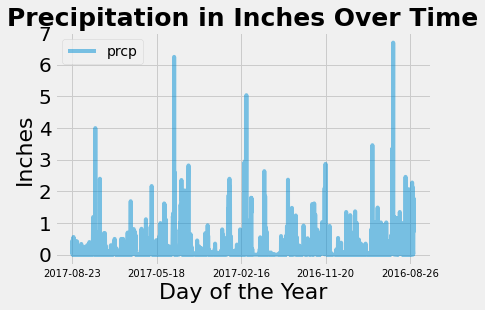

In [96]:
#Use Pandas Plotting with Matplotlib to plot the data
clean_df.plot(x_compat=True, alpha=0.5)
plt.title("Precipitation in Inches Over Time", fontsize=25, weight='bold')
plt.yticks(size=20)
plt.ylabel('Inches', size=22)
plt.xlabel('Day of the Year', size=22)
plt.legend()
plt.xticks( size=10)
plt.savefig('precipitation_over_time.png') #save figure
plt.show()

# Exploratory Station Analysis

In [97]:
# Design a query to calculate the total number stations in the dataset
total_number_station=session.query(Measurement.station).distinct().count()
print(f"total number of unique stations in the dataset {total_number_station}")
total_station=session.query(Measurement.station).count()
print(f"total number of stations in the dataset {total_station}")

total number of unique stations in the dataset 9
total number of stations in the dataset 19550


In [98]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=engine.execute("SELECT station,count(station) as count FROM measurement group by station order by count desc").fetchall()

In [99]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.avg(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs)]
most_active_station_analysis=session.query(*sel).\
                    filter(Measurement.station=='USC00519281').all()
most_active_station_analysis
print(f"average value of temperaqture for  most active stations is {most_active_station_analysis[0][0]}")
print(f"minimum value of temperaqture for  most active stations is {most_active_station_analysis[0][1]}")
print(f"maximum value of temperaqture for  most active stations is {most_active_station_analysis[0][2]}")

average value of temperaqture for  most active stations is 71.66378066378067
minimum value of temperaqture for  most active stations is 54.0
maximum value of temperaqture for  most active stations is 85.0


In [100]:
# df3=pd.read_sql_query("""select Measurement.date,Measurement.tobs from measurement 
# where Measurement.station='USC00519281'""",conn)
# temp_df = df3.set_index("date").sort_index(ascending=True)
# temp_df.head()


temp_results = (
    session.query(Measurement.date, Measurement.tobs)
    .filter(Measurement.date > '2016-08-23')
    .filter(Measurement.station == active_stations[0][0])
    .order_by(Measurement.date)
    .all()
)

# Convert query object to dataframe
temp_df = pd.DataFrame(temp_results,columns=['date','tobs'])
temp_df.head()
temp_df = temp_df.set_index("date").sort_index(ascending=True)
temp_df.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


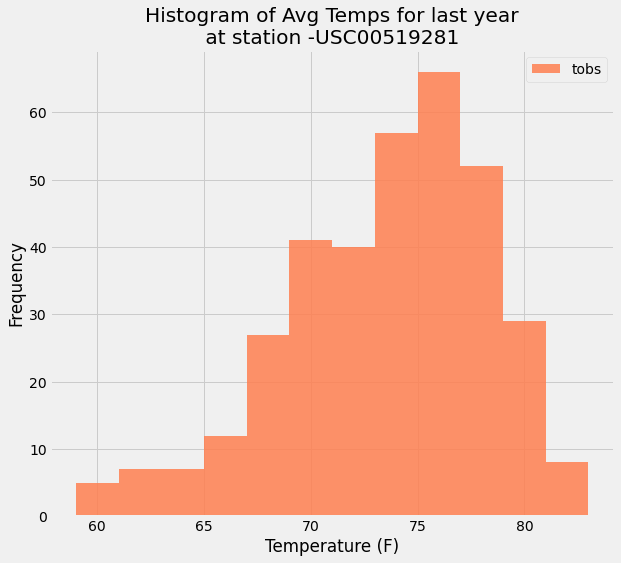

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.plot(kind="hist", color="coral", bins=12, alpha=0.85, figsize=(9, 8))
plt.title(    f"Histogram of Avg Temps for last year\n at station -USC00519281 ")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.savefig('station-histogram.png') #save figure
plt.show()

# Alternate way


In [102]:
#Alternate way of querying data
df4=pd.read_sql("SELECT date, tobs FROM measurement where station='USC00519281' and date >= '2016-08-23'",conn)
df4.head()
temp_df = df4.set_index("date").sort_index(ascending=True)
temp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


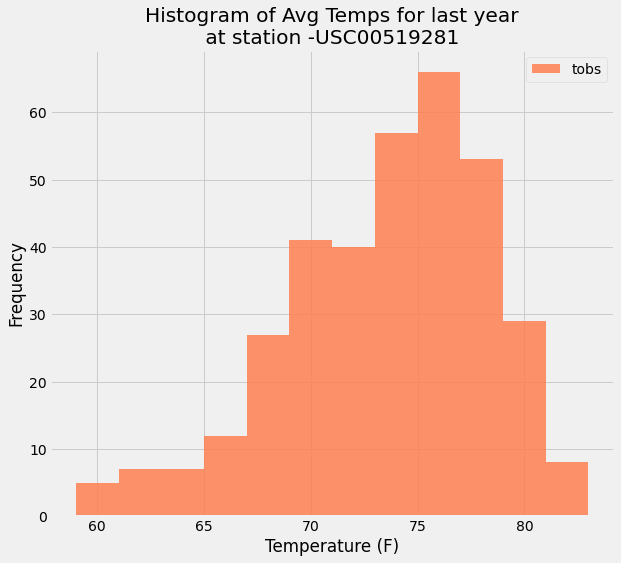

In [103]:
temp_df.plot(kind="hist", color="coral", bins=12, alpha=0.85, figsize=(9, 8))
plt.title(    f"Histogram of Avg Temps for last year\n at station -USC00519281 ")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.savefig('station-histogram_alternate.png') #save figure
plt.show()

In [104]:
# Close Session
session.close()